In [17]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)
n_rows = 800
# Add month index (1 to 12 repeatedly)
months = [(i % 12) + 1 for i in range(n_rows)]

# Generate weather scores with higher values for months 6, 7, 8
weather_score = np.random.uniform(0.4, 1.0, size=n_rows)
for i in range(len(weather_score)):
  if months[i] in [6, 7, 8]:
    weather_score[i] = np.random.uniform(0.8, 1.0)


qt_jeans_kg = np.random.randint(30000, 57000, size=n_rows)  # Updated range
qt_water_to_use_liters = qt_jeans_kg * 100
qt_electricity_to_use_kWh = qt_water_to_use_liters * 14 / 1000  # 14 Wh per liter = 0.014 kWh

# Outputs
pv_output_kWh = np.clip(qt_electricity_to_use_kWh * weather_score * np.random.uniform(0.3, 0.5, size=n_rows), 0, None)
water_saved_liters = qt_water_to_use_liters * 0.75
cost_saved_TND = water_saved_liters * 2.3 / 1000  # 2.3 TND per 1000 liters

# Create DataFrame
df = pd.DataFrame({
    "weather_score": weather_score,
    "qt_jeans_kg": qt_jeans_kg,
    "qt_water_to_use_liters": qt_water_to_use_liters,
    "qt_electricity_to_use_kWh": qt_electricity_to_use_kWh,
    "pv_output_kWh": pv_output_kWh,
    "water_saved_liters": water_saved_liters,
    "cost_saved_TND": cost_saved_TND
})

# Save to CSV (optional)
df.to_csv("synthetic_dataset_updated.csv", index=False)
df.head(10)

,weather_score,qt_jeans_kg,qt_water_to_use_liters,qt_electricity_to_use_kWh,pv_output_kWh,water_saved_liters,cost_saved_TND
0,0.624724,31341,3134100,43877.4,12036.107983,2350575.0,5406.3225
1,0.970429,41855,4185500,58597.0,21478.270524,3139125.0,7219.9875
2,0.839196,54791,5479100,76707.4,25088.483815,4109325.0,9451.4475
3,0.759195,30338,3033800,42473.2,11205.576713,2275350.0,5233.3050
4,0.493611,35895,3589500,50253.0,9293.368050,2692125.0,6191.8875
5,0.941448,42254,4225400,59155.6,19238.987250,3169050.0,7288.8150
6,0.830508,49092,4909200,68728.8,17959.543335,3681900.0,8468.3700
7,0.915258,41344,4134400,57881.6,22286.701893,3100800.0,7131.8400
8,0.760669,31750,3175000,44450.0,14662.208338,2381250.0,5476.8750
9,0.824844,51988,5198800,72783.2,25448.615808,3899100.0,8967.9300


In [18]:
print(df['cost_saved_TND'][5:10])  # Check values from index 5 to 9

5    7288.815
6    8468.370
7    7131.840
8    5476.875
9    8967.930
Name: cost_saved_TND, dtype: float64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

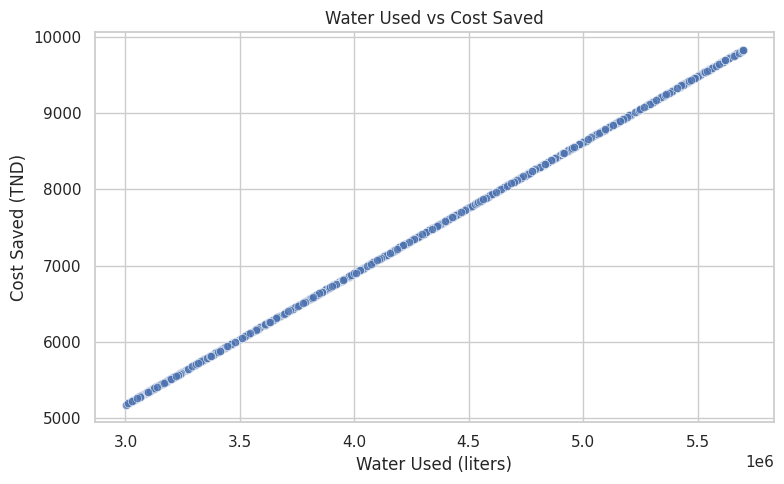

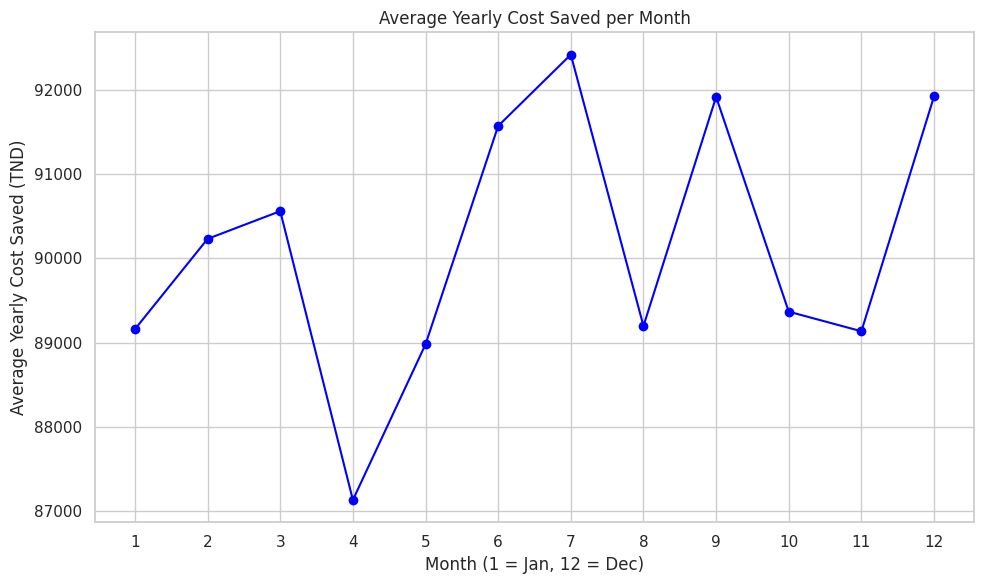

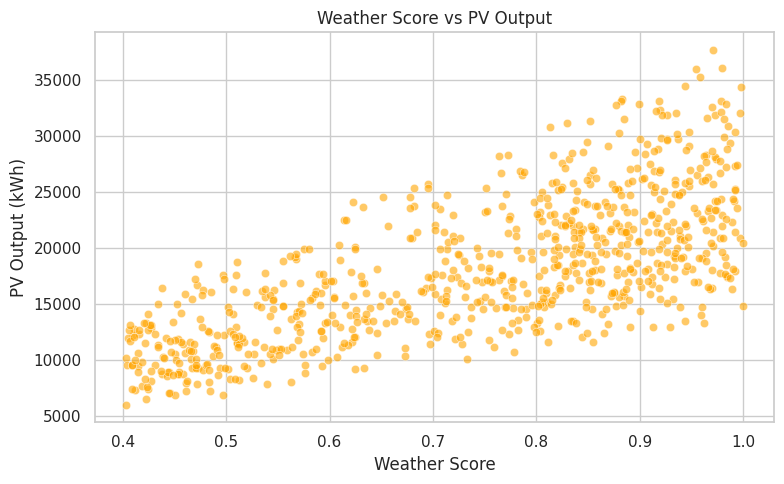

Average Yearly Cost Saved: 90130.81 TND


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for pretty plots
sns.set(style="whitegrid")

# Load your dataset (if not already in memory)
df = pd.read_csv("synthetic_dataset_updated.csv")

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of water used vs cost saved
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="qt_water_to_use_liters", y="cost_saved_TND", alpha=0.7)
plt.title("Water Used vs Cost Saved")
plt.xlabel("Water Used (liters)")
plt.ylabel("Cost Saved (TND)")
plt.grid(True)
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Add month index (1 to 12 repeatedly)
df['Month'] = (df.index % 12) + 1

# Calculate the average monthly cost saved
monthly_avg = df.groupby('Month')['cost_saved_TND'].mean()

# Convert to yearly cost saved
yearly_avg_cost_saved = monthly_avg * 12

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, yearly_avg_cost_saved, marker='o', color='blue')
plt.title('Average Yearly Cost Saved per Month')
plt.xlabel('Month (1 = Jan, 12 = Dec)')
plt.ylabel('Average Yearly Cost Saved (TND)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()



# PV Output vs Weather Score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="weather_score", y="pv_output_kWh", alpha=0.6, color="orange")
plt.title("Weather Score vs PV Output")
plt.xlabel("Weather Score")
plt.ylabel("PV Output (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the average monthly cost saved
average_monthly_cost_saved = df['cost_saved_TND'].mean()

# Calculate the average yearly cost saved
average_yearly_cost_saved = average_monthly_cost_saved * 12

print(f"Average Yearly Cost Saved: {average_yearly_cost_saved:.2f} TND")



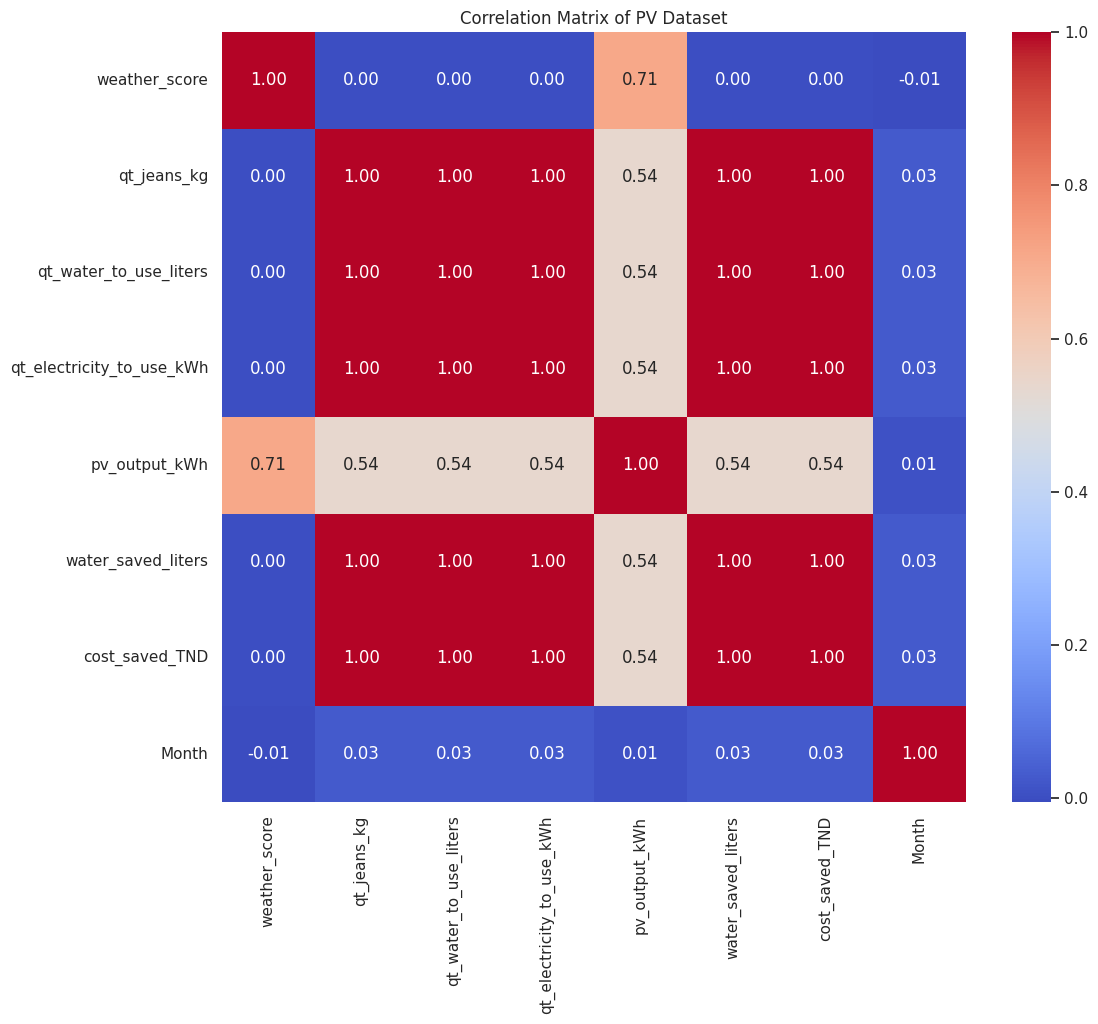

In [21]:
# Assuming your DataFrame is named 'df'
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of PV Dataset")
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define features and target
X = df[['weather_score', 'qt_jeans_kg', 'qt_water_to_use_liters', 'qt_electricity_to_use_kWh']]
y = df['cost_saved_TND']

# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} → MAE: {mae:.2f} TND | R²: {r2:.2f}")


Random Forest → MAE: 3.22 TND | R²: 1.00
XGBoost → MAE: 11.68 TND | R²: 1.00


In [23]:
import joblib
joblib.dump(models['Random Forest'], 'rf_model.pkl')


['rf_model.pkl']

In [24]:
new_input = pd.DataFrame([{
    'weather_score': 0.85,
    'qt_jeans_kg': 58000,
    'qt_water_to_use_liters': 7000000,
    'qt_electricity_to_use_kWh': 98000
}])
prediction = models['Random Forest'].predict(new_input)
print(f"Predicted Cost Saved: {prediction[0]:.2f} TND")


Predicted Cost Saved: 9823.20 TND


In [25]:
!pip install streamlit


In [15]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load model
model = joblib.load("rf_model.pkl")

# App title
st.title("🧠 AI Kit – Cost Savings Estimator")
st.write("Predict monthly savings based on weather, production & resource usage.")

# Sidebar input
st.sidebar.header("🛠 Input Parameters")

weather_score = st.sidebar.slider("Weather Score (0: bad - 1: perfect)", 0.0, 1.0, 0.85)
qt_jeans_kg = st.sidebar.number_input("Quantity of jeans produced (kg)", min_value=10000, max_value=100000, value=58000)
qt_water_to_use_liters = st.sidebar.number_input("Water to be used (liters)", min_value=1000000, max_value=10000000, value=7000000)
qt_electricity_to_use_kWh = st.sidebar.number_input("Electricity to be used (kWh)", min_value=10000, max_value=200000, value=98000)

# Predict
input_data = pd.DataFrame([{
    "weather_score": weather_score,
    "qt_jeans_kg": qt_jeans_kg,
    "qt_water_to_use_liters": qt_water_to_use_liters,
    "qt_electricity_to_use_kWh": qt_electricity_to_use_kWh
}])

if st.button("Predict Savings 💰"):
    prediction = model.predict(input_data)[0]
    st.success(f"✅ Estimated Monthly Cost Saved: **{prediction:.2f} TND**")

# Footer
st.markdown("---")
st.caption("Built with ❤️ for sustainable textile industries in Tunisia.")


2025-04-20 02:06:13.215 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 02:06:13.394 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-20 02:06:13.398 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 02:06:13.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 02:06:13.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 02:06:13.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 02:06:13.416 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-20 02:06:13.419 Thread 'MainThread': mi

DeltaGenerator()